<a href="https://colab.research.google.com/github/kinaya18/Deep-Learning/blob/main/Week8-16/Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 3: Classification**

## **🔍 Apa itu Classification?**

Classification (klasifikasi) adalah salah satu tugas utama dalam Machine Learning, di mana tujuan model adalah memetakan input ke dalam satu atau lebih kategori diskret. Contoh klasik adalah mendeteksi apakah email termasuk spam atau bukan, mengenali wajah dalam gambar, atau menebak angka tulisan tangan dari gambar.

Klasifikasi berbeda dari regresi: klasifikasi memprediksi kelas/label (diskrit), sedangkan regresi memprediksi nilai (kontinu).

Klasifikasi adalah salah satu tugas paling penting dalam Machine Learning, yang bertujuan untuk memprediksi label atau kategori dari suatu input. Berbeda dengan regresi (yang memprediksi nilai kontinu), klasifikasi berurusan dengan label diskret seperti "spam" atau "bukan spam", atau dalam kasus ini, digit angka dari 0–9.

🧠 Dataset: MNIST
MNIST adalah dataset benchmark yang sangat umum untuk tugas klasifikasi. Dataset ini berisi 70.000 gambar digit tulisan tangan (0–9), masing-masing berukuran 28x28 piksel. Setiap gambar dapat direpresentasikan sebagai array 1D berisi 784 nilai intensitas (0–255).

## **Binary Classification: Mendeteksi Angka 5**
Langkah pertama adalah membangun binary classifier, yang hanya menjawab apakah gambar adalah angka “5” atau bukan. Model yang digunakan pertama kali adalah SGDClassifier (Stochastic Gradient Descent), cocok untuk dataset besar dan bersifat online.

Label dikonversi menjadi boolean: True untuk 5, False untuk lainnya.

**1. Load dan Visualisasi Dataset MNIST**

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)  # Konversi string ke integer

In [86]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

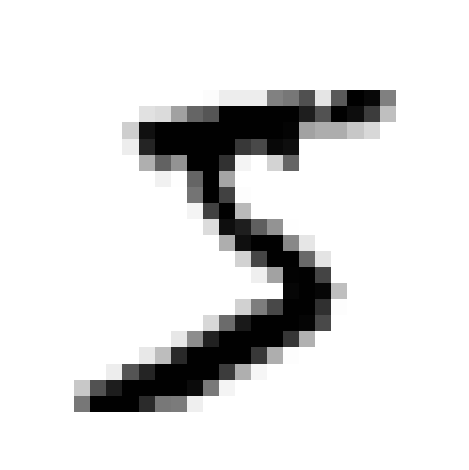

In [87]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

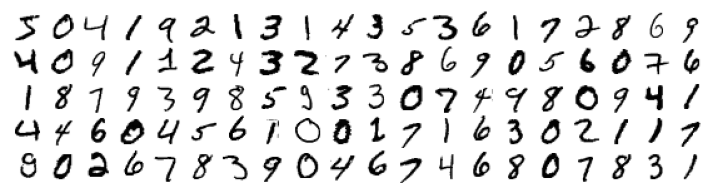

In [89]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(20, 20, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

**2. Membagi Data menjadi Training dan Test**

Dataset terdiri dari 70.000 gambar, 60.000 digunakan untuk training dan 10.000 untuk testing.

In [3]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

**3. Training Binary Classifier (Mendeteksi angka 5)**
Kita mulai dengan tugas klasifikasi biner: mendeteksi apakah gambar adalah angka 5 atau bukan.

In [5]:
from sklearn.linear_model import SGDClassifier

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [6]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

**4. Evaluasi Awal dengan Cross-Validation**

Evaluasi awal dilakukan menggunakan cross-validation untuk melihat akurasi dasar dari model.

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Evaluasi Binary Classifier
Akurasi saja tidak cukup untuk mengukur kinerja pada dataset yang tidak seimbang (angka 5 hanya sekitar 10%). Maka kita perlu evaluasi lebih dalam:

a. Confusion Matrix
Matriks 2x2 yang menunjukkan:
*   True Positive (TP)
*   False Positive (FP)
*   True Negative (TN)
*   False Negative (FN)

b. Precision
Tingkat ketepatan prediksi positif:

    Precision = TP / (TP + FP)

c. Recall (Sensitivity)
Kemampuan mendeteksi semua kasus positif:

    Recall = TP / (TP + FN)

d. F1 Score
Harmonic mean dari precision dan recall:

    F1 = 2 × (Precision × Recall) / (Precision + Recall)

**5. Confusion Matrix, Precision, Recall, dan F1 Score**

Untuk evaluasi yang lebih detail, kita hitung confusion matrix dan metrik lainnya.

In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [9]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [33]:
import matplotlib.pyplot as plt

In [34]:
print(confusion_matrix(y_train_5, y_train_pred))
print("Precision:", precision_score(y_train_5, y_train_pred))
print("Recall:", recall_score(y_train_5, y_train_pred))
print("F1 Score:", f1_score(y_train_5, y_train_pred))

[[53892   687]
 [ 1891  3530]]
Precision: 0.8370879772350012
Recall: 0.6511713705958311
F1 Score: 0.7325171197343847


In [38]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## **Trade-off Precision vs Recall**
Model dapat disesuaikan threshold-nya: menaikkan threshold akan meningkatkan precision tapi menurunkan recall, dan sebaliknya.

Kita bisa memplot kurva Precision-Recall terhadap threshold, dan memilih titik optimal sesuai konteks masalah

**6. Precision vs Recall Trade-off**

Model menghasilkan skor (bukan hanya prediksi label) dengan `decision_function()`, sehingga kita bisa mengatur threshold.

In [11]:
from sklearn.metrics import precision_recall_curve

In [12]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [39]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

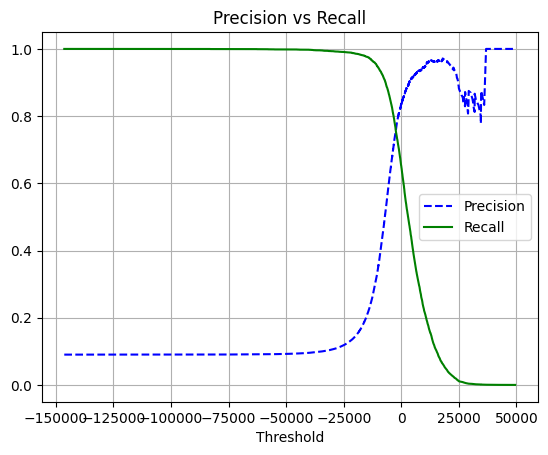

In [13]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend()
    plt.grid(True)
    plt.title("Precision vs Recall")
    plt.show()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

## **ROC Curve dan AUC**
ROC (Receiver Operating Characteristic) menampilkan perbandingan antara True Positive Rate (TPR) dan False Positive Rate (FPR). Semakin melengkung ke kiri atas, semakin baik.

AUC (Area Under Curve) adalah ukuran area di bawah ROC curve. Nilai mendekati 1.0 menunjukkan model sangat baik, sedangkan 0.5 setara dengan tebakan acak.

**7. ROC Curve dan ROC AUC Score**

ROC curve menunjukkan trade-off antara TPR dan FPR.

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

In [15]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

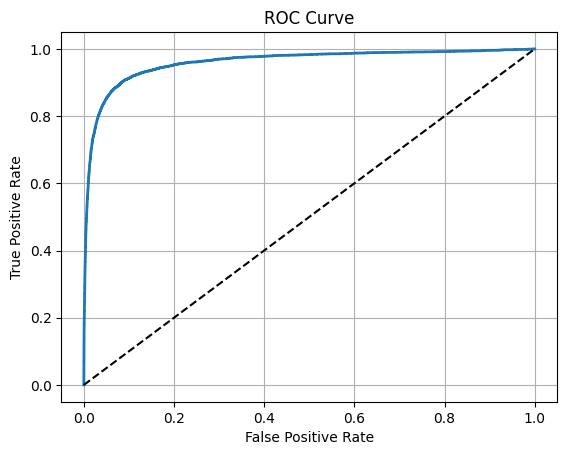

ROC AUC Score: 0.9604938554008616


In [16]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve")
    plt.grid(True)
    plt.show()

plot_roc_curve(fpr, tpr)
print("ROC AUC Score:", roc_auc_score(y_train_5, y_scores))

**RandomForestClassifier**

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
forest_clf = RandomForestClassifier(random_state=42)

In [48]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [49]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

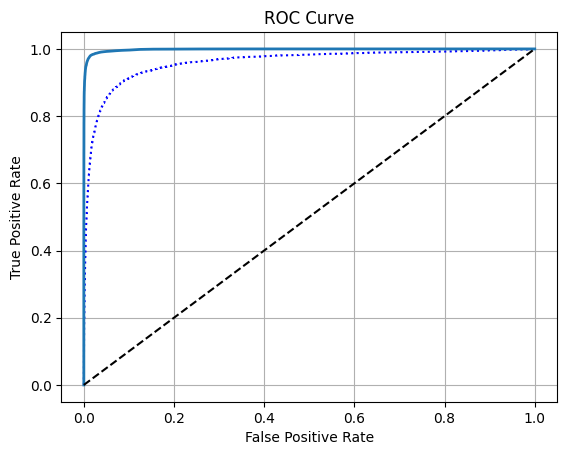

In [53]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest)
plt.show()

In [54]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

## **Multiclass Classification**
Berbeda dari binary classification, multiclass classification menangani lebih dari dua kelas (0–9 untuk MNIST). Scikit-learn menangani ini dengan strategi:

* One-vs-All (OvA): membuat satu classifier untuk tiap kelas.
* One-vs-One (OvO): membuat classifier untuk setiap pasang kelas.

Kita bisa menggunakan model seperti SGDClassifier atau RandomForestClassifier secara langsung untuk multiclass.

**8. Multiclass Classification**

Mengklasifikasi lebih dari dua kelas (digit 0–9).

In [55]:
from sklearn.svm import SVC

In [56]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [57]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [58]:
np.argmax(some_digit_scores)

np.int64(5)

In [59]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [60]:
svm_clf.classes_[5]

np.uint8(5)

If you want to force Scikit-Learn to use one-versus-one or one-versus-the-rest, you
can use the OneVsOneClassifier or OneVsRestClassifier classes.

In [61]:
from sklearn.multiclass import OneVsRestClassifier

In [62]:
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [63]:
len(ovr_clf.estimators_)

10

SGD classifiers

In [64]:
sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict([some_digit])

In [65]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

Use the cross_val_score() func‐
tion to evaluate the SGDClassifier’s accuracy:

In [66]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

## **Feature Scaling**
Scaling sangat penting untuk model seperti SGD karena fitur-fitur dengan skala besar bisa mendominasi. Gunakan StandardScaler untuk menstandarkan data (mean = 0, std = 1).

**9. Scaling Input untuk Meningkatkan Akurasi**

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

In [70]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## **Evaluasi Multiclass**
* Confusion Matrix: untuk multiclass, menghasilkan matriks 10x10.

* Classification Report: menampilkan precision, recall, F1 untuk tiap kelas.

* Visualisasi Confusion Matrix: membantu mendeteksi pola error.

**10. Evaluasi Multiclass dengan Confusion Matrix dan Report**

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

In [72]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(classification_report(y_train, y_train_pred))

[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      5923
           1       0.97      0.95      0.96      6742
           2       0.93      0.88      0.90      5958
           3       0.92      0.85      0.88      6131
           4       0.94      0.89      0.91      5842
           5       0.88      0.82      0.85      5421
           6       0.95      0.94      0.95      5918
           7       0.95      0.91   

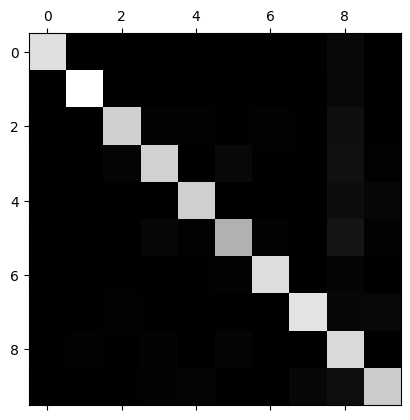

In [73]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [74]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

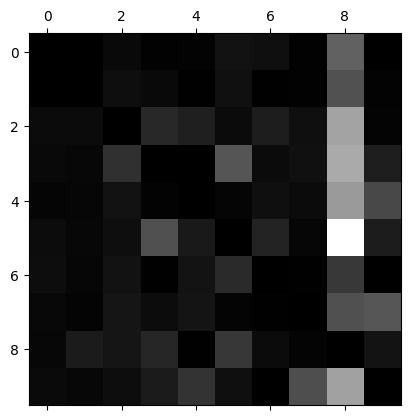

In [75]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## **Analisis Kesalahan (Error Analysis)**
Untuk meningkatkan model, penting memahami kesalahan yang terjadi:

* Bandingkan gambar asli dengan prediksi.

* Periksa mana kelas yang paling sering keliru satu sama lain.

* Lakukan analisis visual pada error terbesar.

**11. Analisis Error**

Menampilkan error umum untuk memperbaiki model.

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Normalisasi matriks untuk visualisasi
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

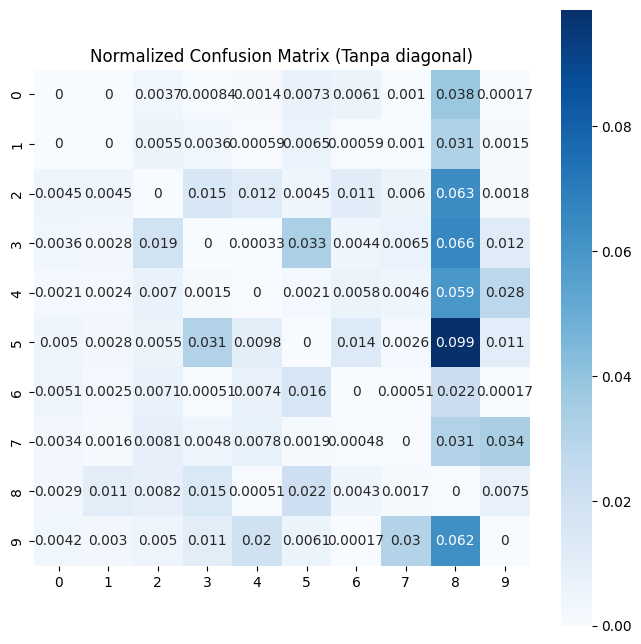

In [92]:
plt.figure(figsize=(8, 8))
sns.heatmap(norm_conf_mx, cmap="Blues", annot=True, square=True)
plt.title("Normalized Confusion Matrix (Tanpa diagonal)")
plt.show()

## **Multilabel Classification**
Setiap instance bisa memiliki lebih dari satu label. Contohnya:

* Label 1: apakah angka >= 7?

* Label 2: apakah angka ganjil?

Model akan mempelajari untuk memprediksi dua (atau lebih) label sekaligus.

**12. Multilabel Classification**

Memberi lebih dari satu label ke satu input.

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [95]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
print(knn_clf.predict([some_digit]))

[[False  True]]


In [96]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

## **Multioutput Classification**
Model memprediksi banyak nilai sekaligus. Contoh: image denoising, di mana input adalah gambar rusak (noisy), output adalah gambar bersih (clear). Setiap piksel diperlakukan sebagai output.

**13. Multioutput Classification (Image Denoising)**

Output berupa array atau label kompleks.

In [97]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
X_test_mod = X_test + np.random.randint(0, 100, (len(X_test), 784))
y_train_mod = X_train

In [98]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

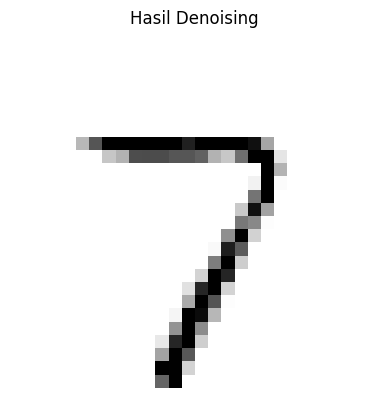

In [100]:
clean_digit = knn_clf.predict([X_test_mod[0]])
plt.imshow(clean_digit.reshape(28, 28), cmap="binary")
plt.title("Hasil Denoising")
plt.axis("off")
plt.show()

# **Penutup**

Chapter 3 adalah fondasi penting untuk memahami klasifikasi dalam ML. Di sini kita tidak hanya belajar membuat model, tapi juga mengevaluasi dan meningkatkan performanya secara sistematis. Teknik seperti multilabel dan multioutput juga membuka cakupan lebih luas dari sekadar klasifikasi tunggal.